# OBJEKTIF PENELUSURAN

1. Melakukan penelusuran kota yang paling sering melakukan order
2. Melakukan analisis waktu transaksi dan tren tiap bulan
3. Menganalisis hubungan review score dengan waktu transaksi

# LANGKAH 1 : Melakukan Import Modules dan Membaca Seluruh Table

In [313]:
# loading in modules
import sqlite3
import pandas as pd
import seaborn as sns

# creating file path
dbfile = 'olist.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


# LANGKAH 2 : Memanggil Table pada Database

In [314]:
# olist_order_customer_dataset
customers = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [315]:
# olist_order_dataset
orders = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
orders.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [316]:
# olist_order_reviews_dataset
reviews = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
reviews.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# LANGKAH 3.1 : Data Wrangling & Data Cleaning

In [317]:
# Menggabungkan table customers dan orders
merge_customers_orders = pd.merge(customers, orders, on= 'customer_id', how = 'outer')
merge_customers_orders.head()

,index_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_y,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [318]:
# Menggabungkan table customers, orders, dan reviews
merge_customers_orders_reviews = pd.merge(merge_customers_orders, reviews, on = 'order_id', how = 'outer')
merge_customers_orders_reviews.head()

,index_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_y,order_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,24307.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,None,None,2017-05-26 00:00:00,2017-05-30 22:34:40
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,67454.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,None,None,2018-01-30 00:00:00,2018-02-10 22:43:29
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,43730.0,5ad6695d76ee186dc473c42706984d87,5.0,None,None,2018-06-15 00:00:00,2018-06-15 12:10:59
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,71676.0,059a801bb31f6aab2266e672cab87bc5,5.0,None,None,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,31650.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [319]:
# Pengecekan Missing Values
merge_customers_orders_reviews[['customer_city', 'order_id', 'order_purchase_timestamp', 'review_score']].isna().sum()

customer_city                 0
order_id                      0
order_purchase_timestamp      0
review_score                768
dtype: int64

In [320]:
# Handling Missing Values

# Mencari nilai modus dari kolom review_score
mod_revies_score = merge_customers_orders_reviews["review_score"].mode()[0]
# Menginput NaN pada kolom review_score
merge_customers_orders_reviews["review_score"] = merge_customers_orders_reviews["review_score"].fillna(mod_revies_score)
# Cek NaN sekali lagi
merge_customers_orders_reviews[['customer_city', 'order_id', 'order_purchase_timestamp', 'review_score']].isna().sum()

customer_city               0
order_id                    0
order_purchase_timestamp    0
review_score                0
dtype: int64

In [321]:
# Pengecekan Outlier
merge_customers_orders_reviews[['customer_city', 'order_id', 'order_purchase_timestamp', 'review_score']].describe(include="all")

,customer_city,order_id,order_purchase_timestamp,review_score
count,99992,99992,99992,99992.000000
unique,4119,99441,98875,NaN
top,sao paulo,c88b1d1b157a9999ce368f218a407141,2018-03-31 15:08:21,NaN
freq,15634,3,5,NaN
mean,NaN,NaN,NaN,4.093437
std,NaN,NaN,NaN,1.344761
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,5.000000


In [322]:
# Pengecekan Inconsistent Format
merge_customers_orders_reviews[['customer_city', 'order_id', 'order_purchase_timestamp', 'review_score']].value_counts()

customer_city        order_id                          order_purchase_timestamp  review_score
belo horizonte       8e17072ec97ce29f0e1f111e598b0c85  2018-03-31 15:08:21       1.0             3
canoas               df56136b8031ecd28e200bb18e6ddb2e  2017-01-26 13:15:41       5.0             3
presidente prudente  c3ec5c70256966fe8951602e15e63495  2017-02-18 14:36:49       3.0             2
sao paulo            23afc00db0b1c005196306f02e1c1178  2018-03-16 07:01:56       5.0             2
laguna               b77200a7cbfba12d399cea6ab05f0056  2017-11-05 22:21:05       5.0             2
                                                                                                ..
itabuna              7eebf0a4be5859d04ca7da2ce039c044  2017-03-08 16:52:50       4.0             1
                     7bf262f298d3a3e62a691b4bcb82916d  2018-07-18 23:13:33       5.0             1
                     774f5065182baf2e88e084e3f5eacf56  2017-07-21 17:42:43       3.0             1
               

In [323]:
# Pengecekan Duplicate Data
merge_customers_orders_reviews[['customer_city', 'order_id', 'order_purchase_timestamp', 'review_score']][merge_customers_orders_reviews[['customer_city', 'order_id', 'order_purchase_timestamp', 'review_score']].duplicated(keep = False)]

,customer_city,order_id,order_purchase_timestamp,review_score
439,sao paulo,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,5.0
440,sao paulo,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,5.0
525,birigui,bbf6a647ecc68aa5e79d2cd75ef44c68,2017-09-01 10:33:16,5.0
526,birigui,bbf6a647ecc68aa5e79d2cd75ef44c68,2017-09-01 10:33:16,5.0
735,sao paulo,0176a6846bcb3b0d3aa3116a9a768597,2017-12-25 10:40:52,5.0
...,...,...,...,...
98658,caxias do sul,142b0e3de54c110a3109b26c79d6ec2e,2017-07-02 20:47:23,5.0
99111,linhares,e1f693a7777b9f6ff730a9d2b45a56cb,2017-05-12 10:28:31,5.0
99112,linhares,e1f693a7777b9f6ff730a9d2b45a56cb,2017-05-12 10:28:31,5.0
99813,brasilia,157de1652c032429a625d034be79eeeb,2017-05-10 09:00:07,5.0


# Langkah 3.2 : Data Manipulation

In [324]:
# Mengecek tipe data
merge_customers_orders_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index_x                        99992 non-null  int64  
 1   customer_id                    99992 non-null  object 
 2   customer_unique_id             99992 non-null  object 
 3   customer_zip_code_prefix       99992 non-null  int64  
 4   customer_city                  99992 non-null  object 
 5   customer_state                 99992 non-null  object 
 6   index_y                        99992 non-null  int64  
 7   order_id                       99992 non-null  object 
 8   order_status                   99992 non-null  object 
 9   order_purchase_timestamp       99992 non-null  object 
 10  order_approved_at              99831 non-null  object 
 11  order_delivered_carrier_date   98199 non-null  object 
 12  order_delivered_customer_date  97005 non-null 

In [325]:
# Melakukan konversi tipe data dari object ke datetime
merge_customers_orders_reviews['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], yearfirst = True)

# Hasil informasi setelah dilakukan konversi tipe data
merge_customers_orders_reviews['order_purchase_timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 99992 entries, 0 to 99991
Series name: order_purchase_timestamp
Non-Null Count  Dtype         
--------------  -----         
99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


In [326]:
# Menghitung order terbanyak berdasarkan kota
count_orders_cities = merge_customers_orders_reviews.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False)
count_orders_cities.head()

,customer_city,order_id
3597,sao paulo,15634
3155,rio de janeiro,6926
453,belo horizonte,2795
558,brasilia,2151
1143,curitiba,1525


<AxesSubplot:xlabel='customer_city', ylabel='order_id'>

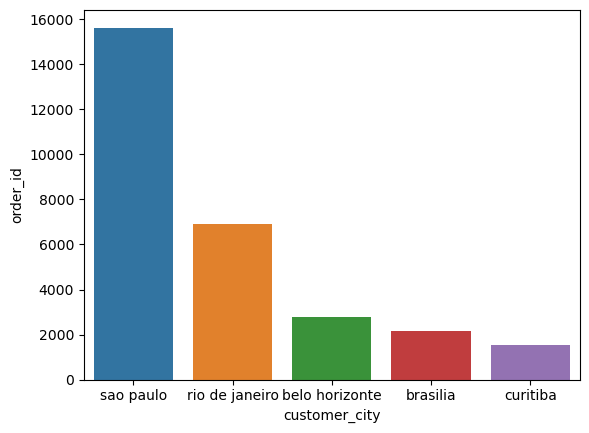

In [327]:
# visualisasi total order berdasarkan kota
sns.barplot(data=count_orders_cities[:5], y="order_id", x="customer_city")

In [328]:
# Mengekstraksi informasi bulan dari kolom order_purchase_timestamp
merge_customers_orders_reviews['month'] = merge_customers_orders_reviews['order_purchase_timestamp'].dt.month

#Menghitung banyaknya order setiap bulan
purchase_grouped_by_month = merge_customers_orders_reviews.groupby(merge_customers_orders_reviews['month'])['order_id'].nunique().reset_index()
purchase_grouped_by_month

,month,order_id
0,1.0,8067
1,2.0,8502
2,3.0,9886
3,4.0,9338
4,5.0,10567
5,6.0,9409
6,7.0,10314
7,8.0,10839
8,9.0,4304
9,10.0,4959


<AxesSubplot:xlabel='month', ylabel='order_id'>

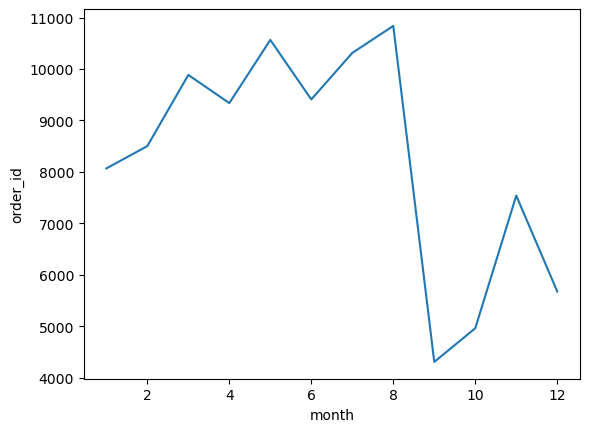

In [329]:
# plot visualisasi tren transaksi setiap bulan
sns.lineplot(data = purchase_grouped_by_month, x = 'month', y = 'order_id')

In [330]:
# Melakukan filtering tanggal selama tahun 2017
month_fiter = merge_customers_orders_reviews['order_purchase_timestamp'][(merge_customers_orders_reviews['order_purchase_timestamp'] >='2017-01-01') & (merge_customers_orders_reviews['order_purchase_timestamp'] <='2017-12-31')]
print(f"Record awal :  {month_fiter.min()}")
print(f"Record akhir:  {month_fiter.max()}")

Record awal :  2017-01-05 11:56:06
Record akhir:  2017-12-30 23:53:28


In [331]:
# Mengekstraksi informasi bulan dari kolom order_purchase_timestamp
merge_customers_orders_reviews['month'] = month_fiter.dt.month

#Menghitung banyaknya order setiap bulan
purchase_group_by_month = merge_customers_orders_reviews.groupby(merge_customers_orders_reviews['month'])['order_id'].nunique().reset_index()
purchase_group_by_month

,month,order_id
0,1.0,799
1,2.0,1780
2,3.0,2682
3,4.0,2404
4,5.0,3700
5,6.0,3245
6,7.0,4026
7,8.0,4331
8,9.0,4284
9,10.0,4631


<AxesSubplot:xlabel='month', ylabel='order_id'>

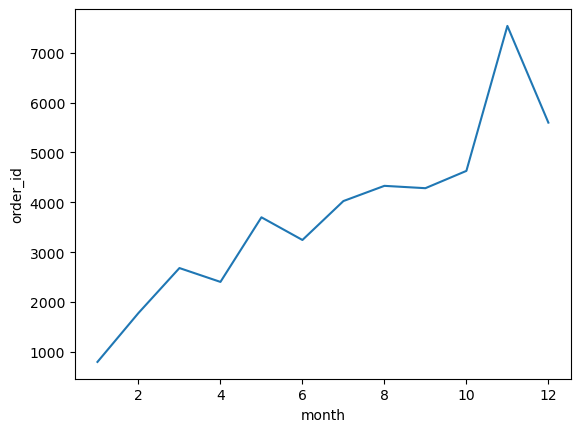

In [332]:
# plot visualisasi tren transaksi setiap bulan
sns.lineplot(data = purchase_group_by_month, x = 'month', y = 'order_id')

In [333]:
#Menghitung nilai rata-rata review_score setiap bulan
review_score_grouped_by_months = merge_customers_orders_reviews.groupby(merge_customers_orders_reviews['month'])['review_score'].mean().reset_index()
review_score_grouped_by_months

,month,review_score
0,1.0,4.055000
1,2.0,4.054494
2,3.0,4.054810
3,4.0,4.113145
4,5.0,4.130270
5,6.0,4.079199
6,7.0,4.101838
7,8.0,4.109674
8,9.0,4.053442
9,10.0,4.069315


<AxesSubplot:xlabel='month', ylabel='review_score'>

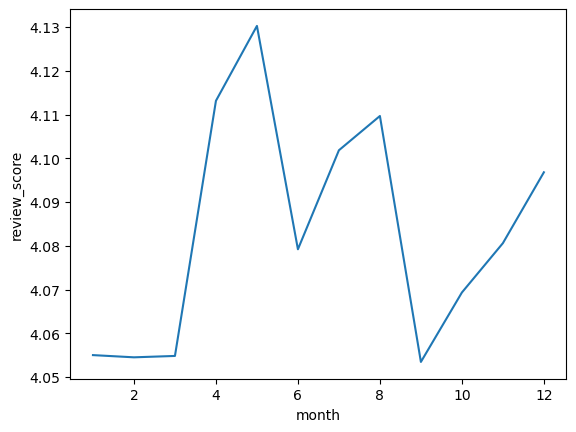

In [334]:
# plot visualisasi tren review_score setiap bulan
sns.lineplot(data = review_score_grouped_by_months, x = 'month', y = 'review_score')